**Importing the libraries**

In [13]:
import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

**Finding out volatility using Standard Deviation**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('Data.csv')

# Extract features
features = data[['Unemployment Rate', 'Interest Rate']]
target = data['Stock Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate predicted volatility
predicted_volatility = np.std(predictions)
print(f'Predicted Volatility: {predicted_volatility}')

data

Predicted Volatility: 8.535707868522394


,Time,Stock Price,Unemployment Rate,Interest Rate
0,2010-01-29,122.39,9.8,0.11
1,2010-02-26,127.16,9.8,0.13
2,2010-03-31,128.25,9.9,0.16
3,2010-04-30,129.00,9.9,0.20
4,2010-05-28,125.26,9.6,0.20
...,...,...,...,...
161,2023-06-30,133.81,3.6,5.08
162,2023-07-31,144.18,3.5,5.12
163,2023-08-31,146.83,3.8,5.33
164,2023-09-29,140.30,3.8,5.33


**Finding out volatility using GARCH Model**

In [15]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
ticker= "IBM"
tsla_data = yf.download(ticker, start="2010-01-01", end="2023-10-01")

[*********************100%%**********************]  1 of 1 completed


In [17]:
tsla_data['Return'] = 100 * (tsla_data['Close'].pct_change())

Text(0.5, 1.0, 'Daily Returns Over Time')

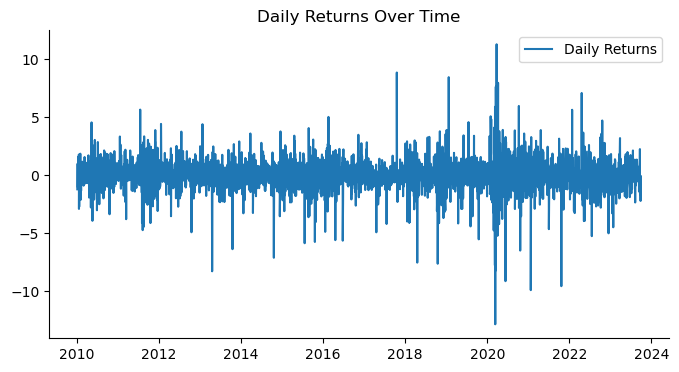

In [18]:
tsla_data.dropna(inplace=True)

fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(tsla_data['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')

In [19]:
daily_volatility = tsla_data['Return'].std()

monthly_volatility = math.sqrt(21) * daily_volatility

annual_volatility = math.sqrt(252) * daily_volatility

In [20]:
from arch import arch_model
from arch.__future__ import reindexing

garch_model = garch_model = arch_model(tsla_data['Return'], p=1, q=1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

mu          0.019568
omega       0.176982
alpha[1]    0.091338
beta[1]     0.815779
Name: params, dtype: float64


Text(0.5, 1.0, 'Rolling Prediction')

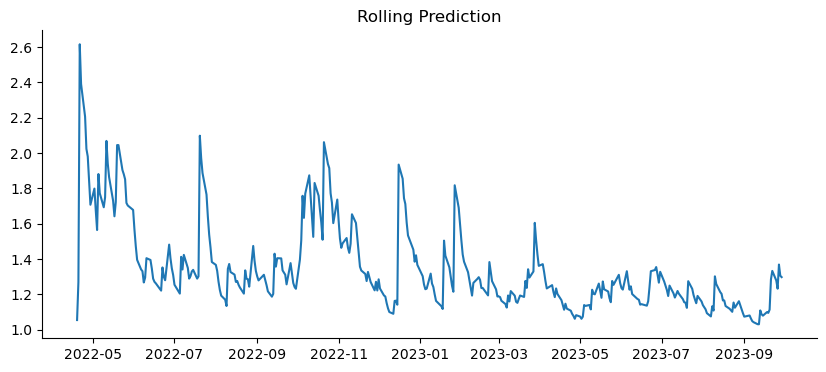

In [21]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = tsla_data['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=tsla_data['Return'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')

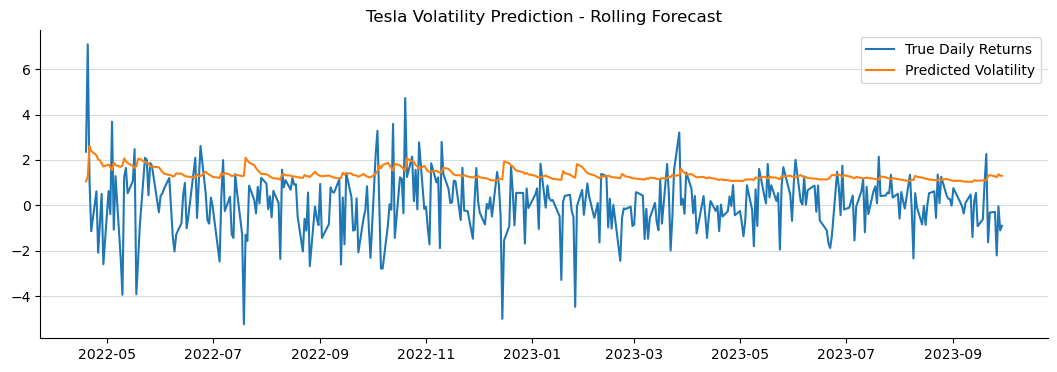

In [22]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(tsla_data['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Tesla Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])

**Finding out volatility using Standard Deviation (can change symbols)**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import yfinance as yf

# Replace 'Data.csv' with the stock symbol and set the start and end dates
stock_symbol = 'IBM'
start_date = '2010-01-01'
end_date = '2023-10-31'

# Fetch stock data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Load the data from the CSV file
csv_data = pd.read_csv('Data.csv')

# Convert 'Date' column in both datasets to datetime
csv_data['Time'] = pd.to_datetime(csv_data['Time'])
stock_data.index = pd.to_datetime(stock_data.index)

# Merge stock data with CSV data on the 'Date' column
merged_data = pd.merge(csv_data, stock_data['Close'], how='inner', left_on='Time', right_index=True)

# Extract features and target
features = merged_data[['Unemployment Rate', 'Interest Rate']]
target = merged_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate predicted volatility
predicted_volatility = np.std(predictions)
print(f'Predicted Volatility: {predicted_volatility}')

[*********************100%%**********************]  1 of 1 completed
Predicted Volatility: 9.470573400806582


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import yfinance as yf

# Replace 'Data.csv' with the stock symbol and set the start and end dates
stock_symbol = 'IBM'
start_date = '2010-01-01'
end_date = '2023-10-31'

# Fetch stock data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Load the data from the CSV file
csv_data = pd.read_csv('Data.csv')

# Convert 'Date' column in both datasets to datetime
csv_data['Time'] = pd.to_datetime(csv_data['Time'])
stock_data.index = pd.to_datetime(stock_data.index)

# Merge stock data with CSV data on the 'Date' column
merged_data = pd.merge(csv_data, stock_data['Close'], how='inner', left_on='Time', right_index=True)

# Extract features and target
features = merged_data[['Unemployment Rate', 'Interest Rate', 'Close']]  # Include 'Close' as a feature
target = merged_data['Close']  # Use 'Close' as the target variable

# GARCH model
garch_model = arch_model(target, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()

# Forecast volatility
garch_forecast = garch_result.forecast(start=1)

# Extract the forecasted volatility
forecasted_volatility = np.sqrt(garch_forecast.variance.iloc[-1, :])
print(f'Predicted Volatility (from GARCH model): {forecasted_volatility.values[0]}')


[*********************100%%**********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4485.516266275691
Iteration:      2,   Func. Count:     13,   Neg. LLF: 719.8668710301515
Iteration:      3,   Func. Count:     18,   Neg. LLF: 21264.09812071342
Iteration:      4,   Func. Count:     26,   Neg. LLF: 727.6573330067872
Iteration:      5,   Func. Count:     32,   Neg. LLF: 713.938708513007
Iteration:      6,   Func. Count:     37,   Neg. LLF: 710.4828133039059
Iteration:      7,   Func. Count:     42,   Neg. LLF: 708.1854702185537
Iteration:      8,   Func. Count:     47,   Neg. LLF: 707.4493554024168
Iteration:      9,   Func. Count:     52,   Neg. LLF: 706.8946754778933
Iteration:     10,   Func. Count:     57,   Neg. LLF: 706.3061708381722
Iteration:     11,   Func. Count:     62,   Neg. LLF: 705.8403748126858
Iteration:     12,   Func. Count:     67,   Neg. LLF: 705.1359195030894
Iteration:     13,   Func. Count:     72,   Neg. LLF: 704.0311959835